<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Policy-Evaluation" data-toc-modified-id="Policy-Evaluation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Policy Evaluation</a></span></li><li><span><a href="#Policy-Improvement" data-toc-modified-id="Policy-Improvement-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Policy Improvement</a></span></li><li><span><a href="#Policy-Iteration" data-toc-modified-id="Policy-Iteration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Policy Iteration</a></span></li><li><span><a href="#Value-Iteration" data-toc-modified-id="Value-Iteration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Value Iteration</a></span></li></ul></div>

# Dynamic Programming

The term dynamic programming (DP) refers to a collection of algorithms that can be
used to compute optimal policies given a perfect model of the environment as a Markov
decision process (MDP).

We usually assume that the environment is a finite MDP. That is, we assume that its
state, action, and reward sets, $\mathcal{S}$, $\mathcal{A}$, and $\mathcal{R}$, are finite, and that its dynamics are given by a
set of probabilities $p(s', r|s, a)$. The key idea of DP, and of reinforcement learning generally, is the use of value functions
to organize and structure the search for good policies.

##  Policy Evaluation

First we consider how to compute the state-value function v⇡ for an arbitrary policy $\pi$.
This is called policy evaluation in the DP literature.

The existence and uniqueness of $v_\pi$ are guaranteed as long as either $\gamma$ < 1 or eventual termination is guaranteed from all states under the policy $\pi$.

If the environment’s dynamics are completely known, then the equation for the value function is a system of $|\mathcal{S}|$ simultaneous linear equations in $|\mathcal{S}|$ unknowns (the $v_\pi(s)$). In principle, its solution is a straightforward, if tedious, computation. For our purposes, iterative solution methods are most suitable. Consider a sequence of approximate value functions $v_0, v_1, v_2, ...$ each mapping $\mathcal{S}^+$ to $\mathcal{R}$. The initial approximation, $v_0$, is chosen arbitrarily (except that the terminal state, if any, must be given value 0), and each successive approximation is obtained by using the Bellman equation for $v_\pi$ as an update rule:

$$ v_{k+1}(s)=\sum_a \pi(a|s)\sum_{s',r}p(s',r|s,a)[r+\gamma v_k(s')] $$

Indeed, the sequence ${v_k}$ can be shown in general to converge to $v_\pi$ as $k\to\infty$ under the same conditions that guarantee the existence of $v_\pi$. This algorithm is called iterative policy evaluation.

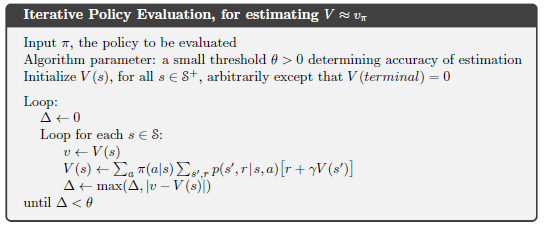

## Policy Improvement

Our reason for computing the value function for a policy is to help find better policies. Suppose we have determined the value function $v_\pi$ for an arbitrary deterministic policy
$\pi$. For some state s we would like to know whether or not we should change the policy
to deterministically choose an action a different than the one given by the current policy. We know how good it is to follow the
current policy from s, but would it be better or worse to change to the
new policy? One way to answer this question is to consider selecting a in s and thereafter following the existing policy. The value of this way of behaving is

$$ q_\pi(s,a)=\sum_{s',r}p(s',r|s,a)[r+\gamma v_\pi(s')] $$

The key criterion is whether this is greater than or less than $v_\pi(s,a)$. If it is greater, then one would expect it to be better still to select a every time s is encountered, and that the new policy would in fact be a better one overall. That this is true is a special case of a general result called the policy improvement theorem.

It is a natural extension to consider changes at all states and to all possible actions, selecting at each state the
action that appears best according to $q_\pi(s, a)$. In other words, to consider the new greedy
policy, $\pi'$, given by:

$$ \pi'(s) = arg\max_a q_\pi(s,a) = arg\max_a\sum_{s',r}p(s',r|s,a)[r+\gamma v_\pi(s')]$$

By construction, the greedy policy meets the conditions of the policy improvement theorem (4.7), so we know that it is as good as, or better than, the original policy. The process of making a new policy that improves on an original policy, by making it greedy with respect to the value function of the original policy, is called policy improvement.

Suppose the new greedy policy, $\pi'$, is as good as, but not better than, the old policy $\pi$. Then $v_\pi = v_{\pi'}$ and therefore, $v_{\pi'}$ must be
$v_*$

## Policy Iteration

Once a policy, $\pi$, has been improved using $v_\pi$ to yield a better policy, $\pi'$, we can then
compute $v_\pi'$ and improve it again to yield an even better $\pi''$. We can thus obtain a sequence of monotonically improving policies and value functions.

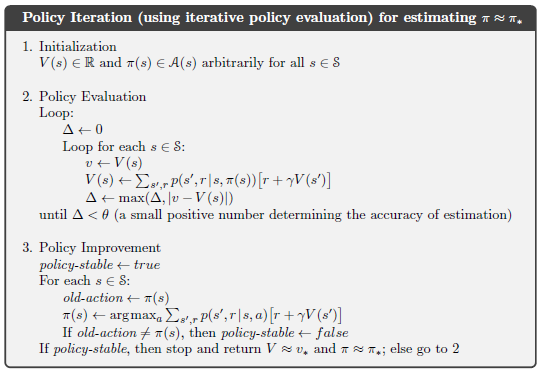

## Value Iteration

The policy evaluation step of policy iteration can be truncated in several ways
without losing the convergence guarantees of policy iteration. A special case is when policy evaluation is stopped after just one sweep (one update of each state).

This algorithm is called value iteration. It can be written as a particularly simple update operation that combines the policy improvement and truncated policy evaluation steps.

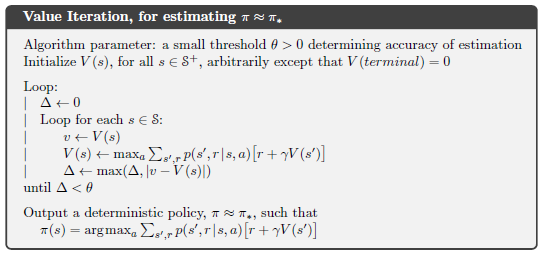